이건 데이터 마님의 파이썬 분석 패키지 쪽에 있는것임 scipy이쪽

In [ ]:
scipy.stats
│
├── 01 T-test
│   │
│   ├── ttest_1samp         (단일표본 t검정)
│   ├── ttest_ind           (독립표본 t검정)
│   └── ttest_rel           (대응표본 t검정)
│
├── 02 비모수 검정
│   │
│   ├── mannwhitneyu        (맨-휘트니 U 검정 - 중위수 , 윌콕슨 순위합 검정과 동일하다 볼 수 있음)
│   ├── ranksums            (윌콕슨 순위합 검정 - 중위수)
│   └── wilcoxon            (윌콕슨 부호 순위합 검정)
│
├── 03 정규정 검정
│   │
│   ├── anderson            (Anderson-Darling , 데이터수가 상대적으로 많을 때)
│   ├── kstest              (Kolmogorov-Smirnov , 데이터수가 상대적으로 많을 때)
│   ├── mstats.normaltest
│   └── shapiro             (shapiro, 노말분포 가장 엄격하게 검정, 데이터수가 상대적으로 적을때)
│
├── 04 등분산 검정
│   │
│   ├── bartlett
│   ├── fligner
│   └── levene
│
├── 05 카이제곱검정
│   │
│   ├── chi2_contingency     (카이제곱독립검정, 독립성 검정)
│   ├── chisquare            (카이제곱검정 , 적합도 검정)
│   └── fisher_exact         (피셔 정확 검정 - 빈도수가 5개 이하 셀의 수가 전체 셀의 20%이상일 경우 사용 )
│
└── 06 ANOVA (일원분산분석)
    │
    └── f_oneway (분산 분석은  statmodels 모듈이 더 좋음! )

##### **정규성 검정**

1.다음 데이터의 정규성을 검증하라

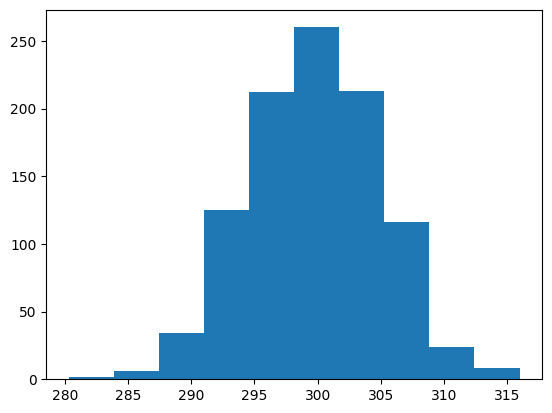

ShapiroResult(statistic=np.float64(0.9981433805517037), pvalue=np.float64(0.3479659233067207))


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal1.csv')
plt.hist(df)
plt.show()


from scipy.stats import shapiro
print(shapiro(df))

#정규성 검증의 귀무가설은: 해당 데이터는 정규성을 만족한다임

# 정답
#  pvalue=np.float64(0.3479659233067207))
# 위와 같이 0.34 즉 0.05보다 크므로 정규성

2.다음 데이터의 정규성을 검증하라

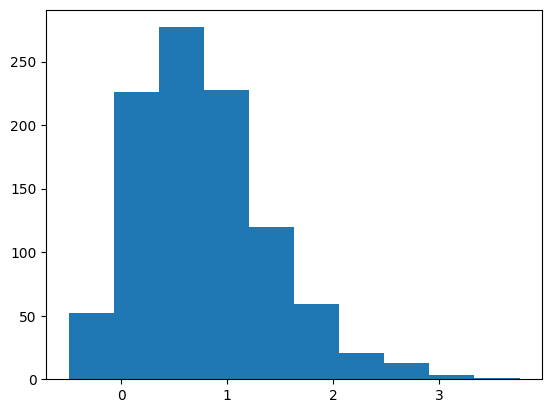

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
plt.hist(df)
plt.show()

In [ ]:
from scipy.stats import shapiro
print(shapiro(df))

#정답
# pvalue=np.float64(2.309852860177995e-16))
# 지금 0.05보다 작기 때문에 정규성을 만족하지 않는다


ShapiroResult(statistic=np.float64(0.9578887230674165), pvalue=np.float64(2.309852860177995e-16))


3.위의 데이터를 log변환 한 후에 정규성을 가지는지 확인하라

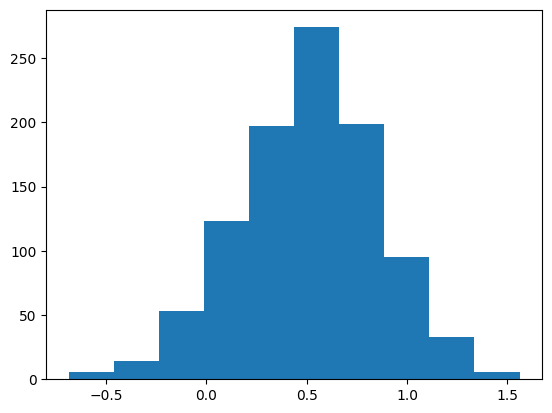

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal3.csv')
log_y_data = np.log1p(df)
plt.hist(log_y_data)
plt.show()

In [ ]:
from scipy.stats import shapiro
print(shapiro(log_y_data))

#정답
# pvalue=np.float64(0.17513126966862336))
# 0.05보다 크므로 정규서을 만족한다

ShapiroResult(statistic=np.float64(0.9976879570377132), pvalue=np.float64(0.17513126966862336))


4.다음 데이터의 정규성을 검증하라

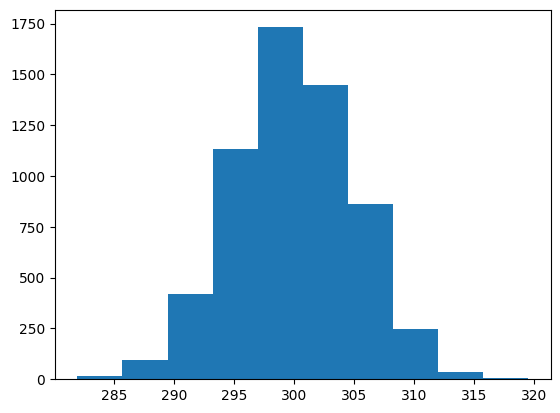

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/normal6.csv')
plt.hist(df)
plt.show()

In [ ]:
from scipy.stats import shapiro
print(shapiro(df))

# pvalue=np.float64(0.15046155392344363))
# 0.05은 정규성을 만족한다


ShapiroResult(statistic=np.float64(0.9995353804150279), pvalue=np.float64(0.15046155392344363))


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6000.
  res = hypotest_fun_out(*samples, **kwds)


단일 표본 t검정 (one-sample)

100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라.
그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height1.csv')

In [ ]:
from scipy.stats import shapiro
print(shapiro(df))

#정답
#pvalue=np.float64(0.45583339816328994))
#귀무가설 채택 -> 정규성 있음

df.mean()

ShapiroResult(statistic=np.float64(0.9872671038154957), pvalue=np.float64(0.45583339816328994))


,0
height,167.622847


In [ ]:
from scipy.stats import ttest_1samp
from scipy.stats import shapiro
from scipy.stats import wilcoxon

static, pvalue = shapiro(df['height'])

# 정규성 x -> 비모수(윌콕슨)
if pvalue < 0.05:
  static, pvalue = wilcoxon(df['height']-165)
  test_name = "Wilcoxon signed-rank test"

# 정규성0 -> 단일표본 t-검정
else:
  static, pvalue = ttest_1samp(df['height'], 165)
  test_name = "One-sample t-test"


print(f"{test_name} p-value: {p}")


if pvalue < 0.05:
      print("귀무가설 기각")
else:
      print("귀무가설 채택")



Wilcoxon signed-rank test p-value: 0.0018367171548080209
귀무가설 기각


100명의 키 정보가 들어 있는 데이터가 있다.데이터가 정규성을 만족하는지 확인하라.
그리고 평균키는 165라 판단할수 있는지 귀무가설과 대립가설을 설정한 후 유의수준 5%로 검정하라.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/height2.csv')

In [ ]:
#정규성검정 - > shapiro
#0.05 보다 작으면-> 정규성X -> 비모수검정 -> 윌콕슨
#0.05q 보다 크면-> 정규성0 -> 모수검정 -> 단일표본 t 검정

from scipy.stats import shapiro
print(shapiro(df))

#pvalue=np.float64(0.013552123212013873))
#귀무가설기각 -> 정규성 만족 x

static, pvalue = shapiro(df['height'])

if pvalue < 0.05:
  static, pvalue = wilcoxon(df['height']-165)
  test_name = "윌콕슨비모수부호검정"


else:
  statoc, pvalue = ttest_1samp(df['height'], 165)
  test_name = "t검정"


print(f"{test_name} p-value : {p}")

if pvalue <0.05:
  print("귀무가설기각")
else:
  print("귀무가설채택")






ShapiroResult(statistic=np.float64(0.9672005190174048), pvalue=np.float64(0.013552123212013873))
윌콕슨비모수부호검정 p-value : 0.0018367171548080209
귀무가설기각


등분산 검정

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy2.csv')
df.head()

,class,score
0,A,84
1,A,59
2,A,49
3,A,57
4,A,82


In [ ]:
from scipy.stats import bartlett
from scipy.stats import fligner
from scipy.stats import levene
#위 3개는 모두 등분산 검정인데, 여러 리스크가 있으므로 실무에서 가장많이 쓰이는 levene만 쓰자!

a = df[df['class'] == 'A'].score
b = df[df['class'] == 'B'].score

#center 는 median과 mean을 쓸떄 사용
print(levene(a, b, center = 'median'))
print(levene(a, b, center= 'mean'))

LeveneResult(statistic=np.float64(0.3145466542912649), pvalue=np.float64(0.5751662820554713))
LeveneResult(statistic=np.float64(0.5086970687685527), pvalue=np.float64(0.4760514837800255))


두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라



In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy6.csv')
df.head()


from scipy.stats import levene
print(levene(df['A'], df['B']))

LeveneResult(statistic=np.float64(5.147914610463281), pvalue=np.float64(0.023868975493455683))


두개 학급의 시험성적에 대한 데이터이다 그룹간 등분산 검정을 시행하라

In [ ]:
#LeveneResult의 경우 nan값이 포함된다면 연산이 제대로 안된다

import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')
df.head()

print(df.shape)
print(df.isnull().sum())
df = df.dropna()
print(df.isnull().sum())

from scipy.stats import levene
print(levene(df['A'], df['B']))

(300, 2)
A      0
B    120
dtype: int64
A    0
B    0
dtype: int64
LeveneResult(statistic=np.float64(3.390717034631767), pvalue=np.float64(0.06639157328361728))


독립표본 검정 (Independent)

두개 학급의 시험성적에 대한 데이터이다. 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라

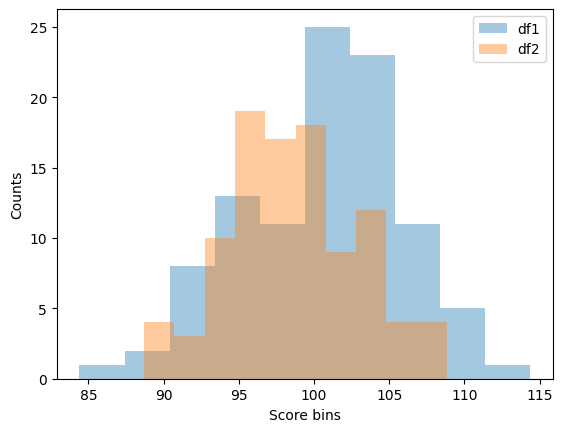

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind1.csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind2.csv')


plt.hist(df1,label='df1',alpha=0.4)
plt.hist(df2,label="df2",alpha=0.4)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()


In [ ]:
#1.정규성만족
from scipy.stats import shapiro
print(shapiro(df1))
print(shapiro(df2))

#둘다 0.05 이상이므로 귀무가설 채택 -> 정규성 만족
#두 시험의 평균은 동일하다 말할 수 있는지 확인

#2.등분산성검정
from scipy.stats import levene
print(levene(df1['data'], df2['data']))
#0.05 이상이므로  귀무가설채택 -> 등분산은가진다

#3.등분산이기 때문에 t test진행해야함 ->등분산을 가지면 ttest에서 equal_var = True를 하고, 등분산을 가지지 않으면 equal_var = False로 한다
from scipy.stats import ttest_ind
print(ttest_ind(df1,df2,equal_var = True))
#pvlaue는 0.05보다 작으므로 귀무가설기각하고 대립가설 채택 -> 시험평균은동일하다를 기각하고 대립가설을 채택한다


ShapiroResult(statistic=np.float64(0.9860948333328381), pvalue=np.float64(0.3796835726350978))
ShapiroResult(statistic=np.float64(0.9901827646291556), pvalue=np.float64(0.6793743269084671))
LeveneResult(statistic=np.float64(2.5337683795339547), pvalue=np.float64(0.11302904824469096))
TtestResult(statistic=array([2.76719074]), pvalue=array([0.00619015]), df=array([198.]))


두개 학급의 시험성적에 대한 데이터이다. 두 학습의 시험 평균(비모수검정의 경우 중위값)은 동일하다 말할 수 있는지 확인 하라

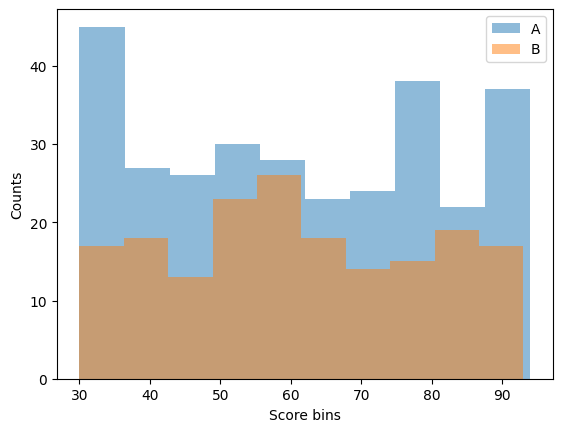

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/scipy5.csv')

plt.hist(df['A'],alpha=0.5,label='A')
plt.hist(df['B'].dropna(),alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [ ]:
#1. 정규성 검정 -> shapiro
from scipy.stats import shapiro
print(shapiro(df1))
print(shapiro(df2))
#0.05보다 크므로 정규성 있음


#2. 등분산성 검정 - >levene
from scipy.stats import levene
print(levene(df1['data'], df2['data']))
#0.05보다 크므로 등분산성 존재


#3. 등분산이 존재하므로 ttest에서 equal_var =True)를 해야함
from scipy.stats import ttest_ind
ttest_ind(df1, df2, equal_var =True)
#pvalue는 0.006이므로 귀무가설을 기각하고 대립가설 채택 -> 귀무가설을 기각한다 -> 두 학습의 시험평균은 동일하다 할수 없다


ShapiroResult(statistic=np.float64(0.9860948333328381), pvalue=np.float64(0.3796835726350978))
ShapiroResult(statistic=np.float64(0.9901827646291556), pvalue=np.float64(0.6793743269084671))
LeveneResult(statistic=np.float64(2.5337683795339547), pvalue=np.float64(0.11302904824469096))


TtestResult(statistic=array([2.76719074]), pvalue=array([0.00619015]), df=array([198.]))

두개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라

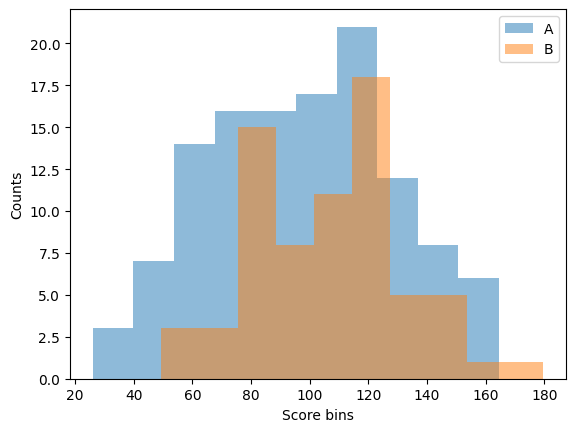

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind3.csv')

plt.hist(df[df['group'] =='a'].data,label='A',alpha=0.5)
plt.hist(df[df['group'] =='b'].data,label="B",alpha=0.5)
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [ ]:
df

,group,data
0,a,108.065847
1,a,88.714106
2,a,61.182748
3,a,51.763444
4,a,127.858730
...,...,...
185,b,100.192985
186,b,112.081790
187,b,83.148014
188,b,147.504761


In [ ]:
#1. 정규성 검정 -> Shapiro
#2. 등분산 검정 -> levene
#3. ttest -> 등분산성 0 -> eqaul_var = True, 등분산성 X -> equal_var = False

a = df[df['group'] == 'a'].data
b = df[df['group'] == 'b'].data
from scipy.stats import shapiro
print(shapiro(a))
print(shapiro(b))

#둘다 0.05보다 작아서 귀무가설 기각 -> 정규성 만족 x -> 비모수 검정 진행

from scipy.stats import levene
print(levene(a, b))
#0.05보다 작기 때문에 귀무가설 기각 -> 등분산성 만족 X

#equal_var = False
from scipy.stats import ttest_ind
print(ttest_ind(a, b, equal_var = False))

# 0.05보다 작으므로 귀무가설을 기각하고 대립가설 체택 -> 두그룹의 평균은 동일하지 않다


ShapiroResult(statistic=np.float64(0.9834129647404514), pvalue=np.float64(0.14741800674950262))
ShapiroResult(statistic=np.float64(0.9831848013864214), pvalue=np.float64(0.47017519736901897))
LeveneResult(statistic=np.float64(6.185601018015722), pvalue=np.float64(0.013750484571911342))
TtestResult(statistic=np.float64(-2.1949470315829265), pvalue=np.float64(0.029512802991767898), df=np.float64(171.25282465005142))


두개 그룹에 대한 수치형 데이터이다. 두 그룹의 평균은 동일하다 말할 수 있는지 검정하라

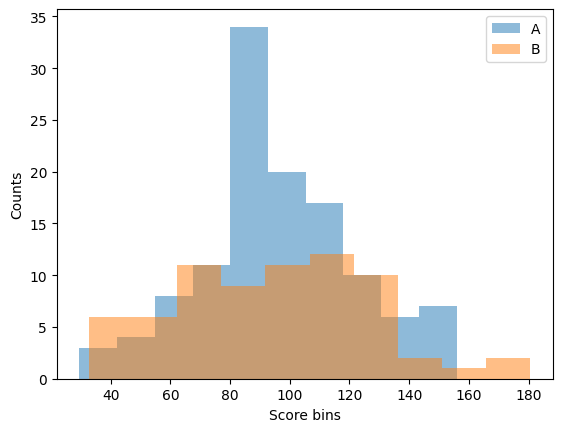

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/ind6.csv')

plt.hist(df['a'],alpha=0.5,label='A')
plt.hist(df['b'],alpha=0.5,label="B")
plt.xlabel('Score bins')
plt.ylabel('Counts')
plt.legend()
plt.show()

In [ ]:
a = df['a']
b = df['b']

print(a.isnull().sum())
print(b.isnull().sum())
b = b.dropna()
print(a.isnull().sum())
print(b.isnull().sum())

#정규성 검정 -> 만족 X
from scipy.stats import shapiro
print(shapiro(a))
print(shapiro(b))

#등분산성 -> 0.05보다 작으니 귀무가설 기각 -> 등분산성 X
from scipy.stats import levene
print(levene(a,b))

#ttest equal_var = False로 가야함)
from scipy.stats import ttest_ind
print(ttest_ind(a,b, equal_var = False))

#0.99이므로 귀무가설 기각하고 대립가설을 채택 한다 -> 두 그룹의 평균은 동일하다고 할 수 없다

0
50
0
0
ShapiroResult(statistic=np.float64(0.9865897179339467), pvalue=np.float64(0.2839111805144998))
ShapiroResult(statistic=np.float64(0.985432512495046), pvalue=np.float64(0.5937526914945275))
LeveneResult(statistic=np.float64(3.9862856894158347), pvalue=np.float64(0.04731495612868527))
TtestResult(statistic=np.float64(0.0015963310698567184), pvalue=np.float64(0.9987289046092704), df=np.float64(122.72255248639058))


대응표본 t 검정 (paired)

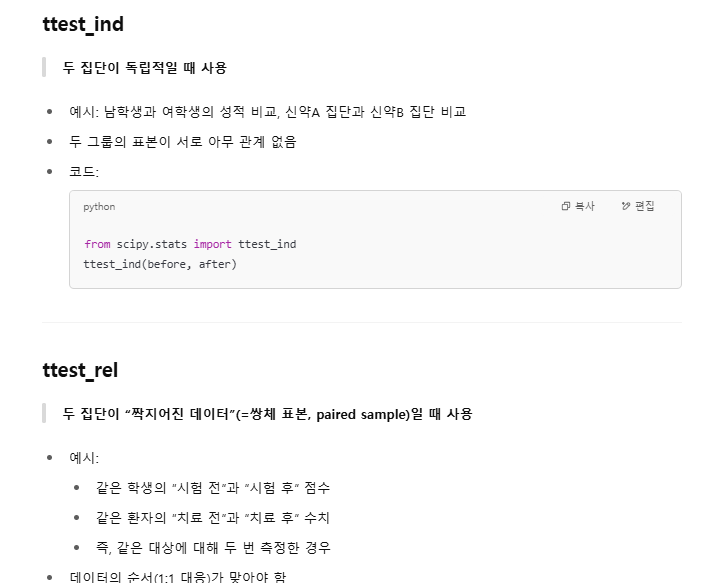

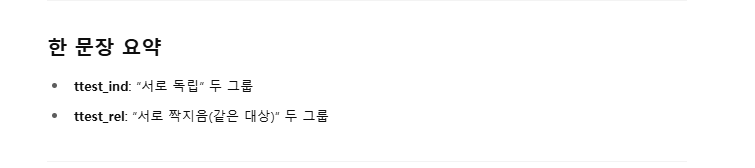

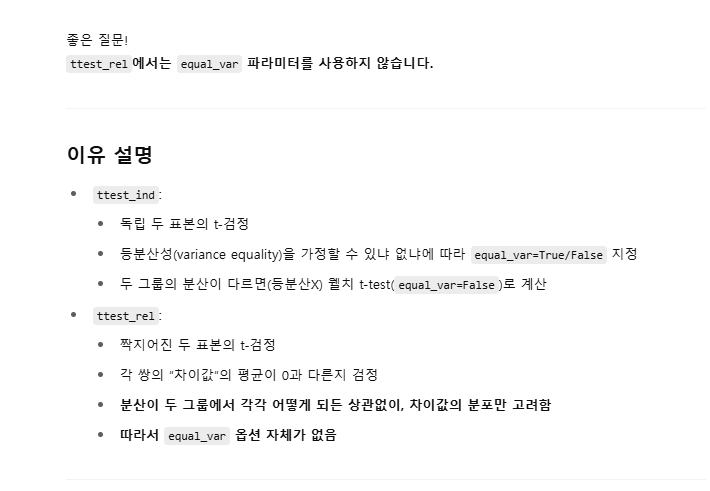

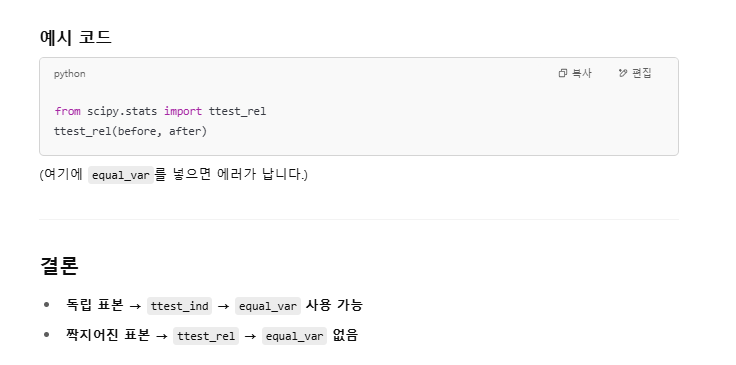

#정리
1. 동일한 집단을 기준으로 전후 등을 검증 할 때 -> ttest_rel

#vs

2. 두 독립적인 집단을 기준으로 검증할때 -> ttest_ind
ex) 두개 학급의 ㅅ


특정 질병 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다. 투약 전후의 변화가 있는지 검정하라

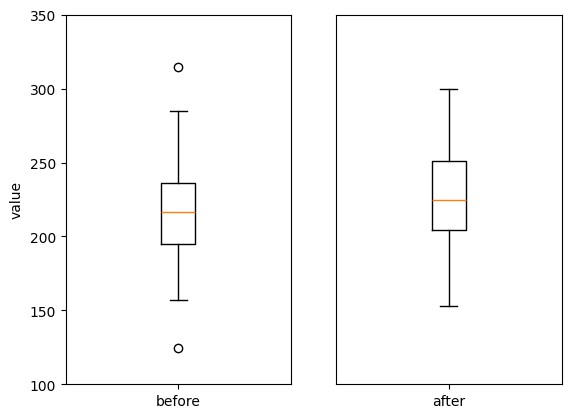

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel2.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(100,350)
ax[1].set_ylim(100,350)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [2]:

#2개 데이터로 정의
before = df['before']
after = df['after']

#정규성 검정 shapiro
from scipy.stats import shapiro

#매우중요!★전후 차이 검정하라 했으므로 정규성 검정을 각각하는게 아니라 전후 뺸값을 바탕으로 정규성 검정을 헤야함!!!
diff =df['before'] - df['after']

print(shapiro(diff))


# 0.6므로 정규성 만족


#등분산성 검정 levene
from scipy.stats import levene
print(levene(before, after))
#0.8이므로 등분산성 만족



#ttest equal_var = True / False  -> 대응표본의 경우 등분산성이 파라미터의 영향을 주지 않음 즉 equal_var을 안해도 됨
#동일한 집단을 기준으로 하기 때문에 이거 하면 안됨
# from scipy.stats import ttest_ind
# print(ttest_ind(before, after, equal_var =True))

#동일한 집단의 투여여부를 보는것으로 ttest_rel을 사용해야함

from scipy.stats import ttest_rel
print(ttest_rel(before, after))
# 0.01이므로 0.05보다 작다 - >귀무가설 기각-> 대립가설 채택 투약전후 변화가 있다

ShapiroResult(statistic=np.float64(0.9897253077639613), pvalue=np.float64(0.5101496793257896))
LeveneResult(statistic=np.float64(0.06427968690211128), pvalue=np.float64(0.8000741651677987))
TtestResult(statistic=np.float64(-2.5535473487670677), pvalue=np.float64(0.011926744724546513), df=np.int64(119))


특정 질병 집단의 투약 전후의 혈류량 변화를 나타낸 데이터이다. 투약 전후의 변화가 있는지 검정하라

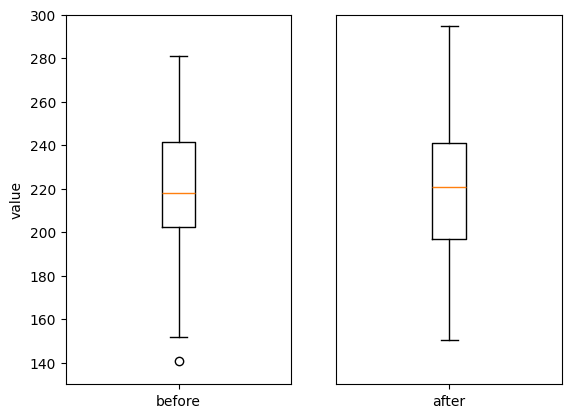

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel3.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(130,300)
ax[1].set_ylim(130,300)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

In [ ]:
before = df['before']
after = df['after']

from scipy.stats import shapiro
#전후 검정이기 떄문에 각각하는게 아닌 뺸 값을 돌려야함
from scipy import stats
diff= df['before'] - df['after']
# 정규성 ㅇㅋ

from scipy.stats import levene
print(levene(before, after))
#등분산 ㅇㅋ

from scipy.stats import ttest_rel
print(ttest_rel(before, after))
#차이가 있다


ShapiroResult(statistic=np.float64(0.9907895174016046), pvalue=np.float64(0.6065791087935604))
ShapiroResult(statistic=np.float64(0.9916963493176595), pvalue=np.float64(0.692386232128563))
LeveneResult(statistic=np.float64(0.06427968690211128), pvalue=np.float64(0.8000741651677987))
TtestResult(statistic=np.float64(-2.5535473487670677), pvalue=np.float64(0.011926744724546513), df=np.int64(119))


특정 집단의 학습 전 후 시험 성적 변화를 나타낸 데이터이다. 시험 전과 후에 차이가 있는지 검정하라



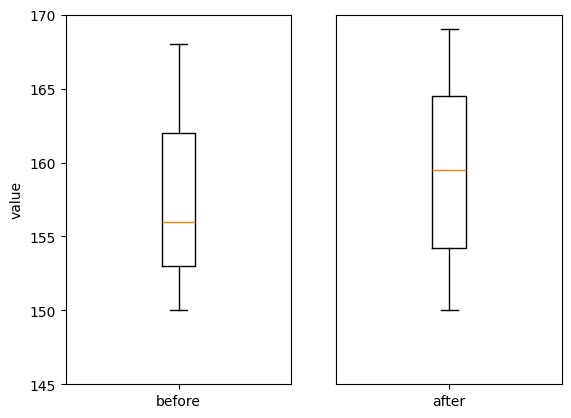

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel1.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df['before'])
ax[1].boxplot(df['after'])
ax[0].set_xticklabels(['before'])
ax[1].set_xticklabels(['after'])
ax[0].set_ylim(145,170)
ax[1].set_ylim(145,170)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('value')
plt.show()

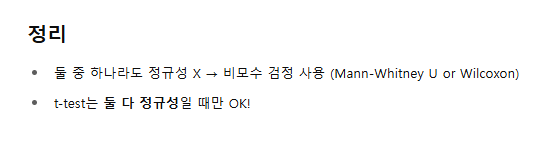

In [ ]:
df.head(5)

before = df['before']
after = df['after']

from scipy.stats import shapiro
print(shapiro(before))
print(shapiro(after))

# before는 정규성 만족x
# after는 정규성 만족 0

from scipy.stats import levene
print(levene(before, after))


#등분산성 만족
from scipy.stats import ttest_rel
print(ttest_rel(before, after))

# 0.02므로 0.05보다 작다 귀무가설 기각 -> 대립가설 채택  -> 시험 전후에 차이가 있다





ShapiroResult(statistic=np.float64(0.9907895174016046), pvalue=np.float64(0.6065791087935604))
ShapiroResult(statistic=np.float64(0.9916963493176595), pvalue=np.float64(0.692386232128563))
LeveneResult(statistic=np.float64(0.06427968690211128), pvalue=np.float64(0.8000741651677987))
TtestResult(statistic=np.float64(-2.5535473487670677), pvalue=np.float64(0.011926744724546513), df=np.int64(119))


한 기계 부품의 rpm 수치를 두가지 다른 상황에서 측정했다.(총 70세트) b 상황이 a 상황보다 rpm값이 높다고 말할 수 있는지 검정하라

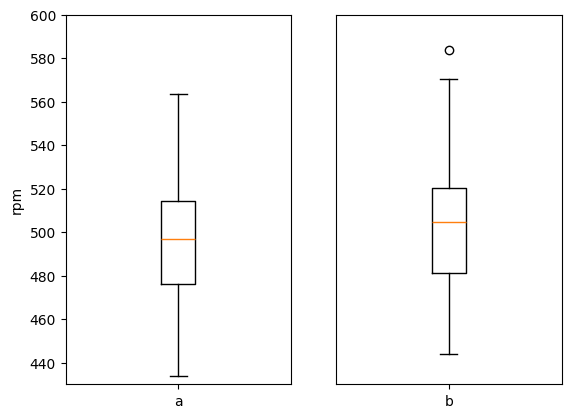

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/rel4.csv')

fig ,ax = plt.subplots(1,2)
ax[0].boxplot(df[df['group']=='a'].rpm)
ax[1].boxplot(df[df['group']=='b'].rpm)
ax[0].set_xticklabels(['a'])
ax[1].set_xticklabels(['b'])
ax[0].set_ylim(430,600)
ax[1].set_ylim(430,600)
ax[1].get_yaxis().set_visible(False)
ax[0].set_ylabel('rpm')
plt.show()

In [ ]:
df

,rpm,group
0,474.551593,a
1,450.548420,a
2,563.720934,a
3,506.886966,a
4,471.724049,a
...,...,...
135,508.802475,b
136,485.981627,b
137,499.289525,b
138,520.895380,b


In [ ]:
a = df[df['group'] == 'a'].rpm
b = df[df['group'] == 'b'].rpm

from scipy.stats import shapiro
print(shapiro(a))
print(shapiro(b))

from scipy.stats import levene
print(levene(a, b))

from scipy.stats import ttest_rel
print(ttest_rel(a,b, alternative = 'greater'))

크냐고 했더니 0.05 보다 큰 0.9이므로 귀무가설(a가 b보다 크냐?) 기각하고 대립가설 채택b가 a보다 크다 채택



ShapiroResult(statistic=np.float64(0.9907215247460179), pvalue=np.float64(0.888420220853863))
ShapiroResult(statistic=np.float64(0.9846746597671578), pvalue=np.float64(0.5504989397841747))
LeveneResult(statistic=np.float64(0.06716114122680159), pvalue=np.float64(0.7959020864923277))
TtestResult(statistic=np.float64(-1.9018108294460812), pvalue=np.float64(0.9693143365355352), df=np.int64(69))


#카이제곱 검정 (교차분석)

1. 일원카이제곱검정 = chisquare 한개의 요인에 의해 k개의 범주를 가질때 이론적 분포를 따르는지 검정
   
2. 이원카이제곱검정 = chi2_contingency / fisher_exact(빈도수 5개 이하셀이 20%이상일때/
 = #모집단이 두개의 변수에 의해 범주화 되었을때 두 변수들 사이의 관계가 독립인지 아닌지 검정

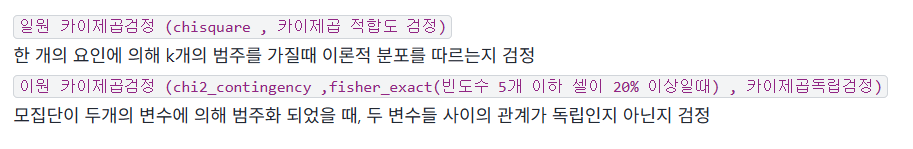

분석표로 여러 정보를 한눈에 보고 싶으면 .value_counts.to_frame()을 쓰고 굳이 안써도 검정은 됨

144회 주사위를 던졌을때, 각 눈금별로 나온 횟수를 나타낸다. 이 데이터는 주사위의 분포에서 나올 가능성이 있는지 검정하라

-> 주사위 던짐이라는 한개의 요인에 의해 1~6까지의 범주를 가지니 이에 대한 검정

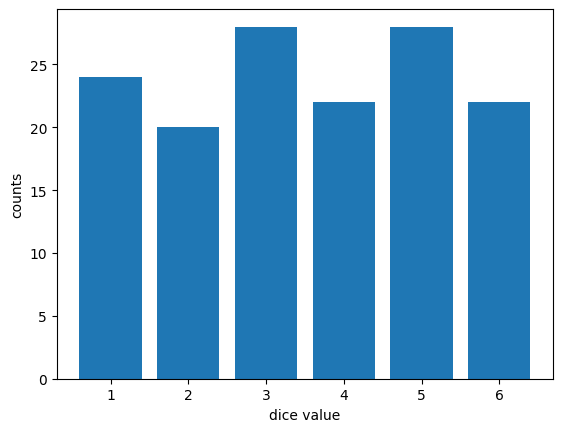

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/dice.csv')

plt.bar(df.dice_number,df.counts)
plt.xlabel('dice value')
plt.ylabel('counts')
plt.show()

In [ ]:
df

,dice_number,counts
0,1,24
1,2,20
2,3,28
3,4,22
4,5,28
5,6,22


In [ ]:
from scipy.stats import chisquare
df['expected'] = (df['counts'].sum()/6).astype('int')
print(chisquare(df.counts , df.expected))


Power_divergenceResult(statistic=np.float64(2.333333333333333), pvalue=np.float64(0.8013589222076911))


다음 데이터는 어떤 집단의 왼손잡이, 오른손 잡이의 숫자를 나타낸다. 인간의 왼손잡이와 오른손잡이의 비율을 0.2:0.8로 알려져있다.
이 집단에서 왼손과 오른손 잡이의 비율이 적합한지 검정하라

-> 어떤손잡이라는 한개의 요인에 의해 오른손 손 이라는 두개의 범주로 나눠져있음

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/hands2.csv')
df.head()

,hands
0,right
1,right
2,left
3,right
4,right


In [ ]:
df.head(2)

,hands
0,right
1,right


In [ ]:
target = df['hands'].value_counts().to_frame(name='hands')
total = target['hands'].sum()

# hands의 인덱스가 어떤 순서로 되어있는지 확인하세요
print(target.index)  # 예: ['오른손', '왼손'] 또는 ['left', 'right']

# 만약 오른손, 왼손 순서라면:
target['expected'] = [total * 0.8, total * 0.2]

# 만약 순서가 왼손, 오른손이면:
# target['expected'] = [total * 0.2, total * 0.8]

from scipy.stats import chisquare
print(chisquare(target['hands'], target['expected']))


Index(['right', 'left'], dtype='object', name='hands')
Power_divergenceResult(statistic=np.float64(5.0), pvalue=np.float64(0.025347318677468325))


In [ ]:
target = df['hands'].value_counts().to_frame(name='hands')
target.index
target['expected'] = [total * 0.8, total*0.2]

from scipy.stats import chisquare
chisquare(target['hands'], target['expected'])
#0.02이므로 귀무가설 기각 대립가설채택 -> 비율이적합하지 않다

Power_divergenceResult(statistic=np.float64(5.0), pvalue=np.float64(0.025347318677468325))

다음 데이터는 국민 기초체력을 조사한 데이터이다. 성별과 등급이 독립적인지 검정하라

chi2_contingency
 ->모집단이 두개의집단(성별과 등급)으로 범주화 되었을때, 두변수들의 사이가 독립인지 검증 하는것

“성별에 따른 동아리 참석 비율의 관련성” → 독립성 검정(chi2_contingency)

“한 집단이 알려진 비율을 따르는지” → 적합도 검정(chisquare)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/body/body.csv')
df.head()

,측정나이,측정회원성별,신장 : cm,체중 : kg,체지방율 : %,이완기혈압(최저) : mmHg,수축기혈압(최고) : mmHg,악력D : kg,앉아윗몸앞으로굽히기 : cm,교차윗몸일으키기 : 회,제자리 멀리뛰기 : cm,등급
0,59.0,M,175.0,70.6,19.2,91.0,150.0,40.6,12.2,30.0,179.0,C
1,40.0,F,161.4,45.8,21.7,62.0,119.0,22.1,16.0,32.0,165.0,B
2,27.0,M,176.6,84.8,19.2,87.0,153.0,45.9,13.2,61.0,216.0,B
3,38.0,M,167.6,76.7,24.7,63.0,132.0,43.6,16.0,45.0,231.0,A
4,21.0,M,165.2,66.2,21.5,83.0,106.0,33.5,10.6,46.0,198.0,C


In [ ]:
cdf = pd.crosstab(df['측정회원성별'], df['등급'])
display(cdf)



from scipy.stats import chi2_contingency
chi2_contingency(cdf)
chi2, pvalue ,dof, expected = chi2_contingency(cdf)
print(pvalue)

# 0.05보다 작으므로 귀무가설(셩별과 체력등급은 독립이다) 기각 -> 대립가설 체택 성별과 체력등급독립이 아니다 -> 즉 관계가 있다

등급,A,B,C,D
측정회원성별,,,,
F,1484,1130,1147,1120
M,1865,2219,2202,2229


7.481892813401677e-26


#성별에 따른 동아리 활동 참석 비율을 나타낸 데이터이다. 성별과 참석간에 관련이 있는지 검정하라
※ 귀무가설은 특별한효과, 차이, 연관성이 없다를 기본으로 놓고 시작함
   - 즉 두변수사이에 아무런 관계가 없다가 디폴트로 작하는거임
   - 대립가설은 효과가 있다로 되는것




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/scipy/fe2.csv',index_col=0)
df

,불참,참석,총합
남성,4,2,6
여성,1,9,10
총합,5,11,16


In [ ]:
cdf = df.iloc[:-1,:-1]
display(cdf)

from scipy.stats import chi2_contingency
print(chi2_contingency(cdf))
chi2, pvalue, dof, expected = chi2_contingency(cdf)
print(pvalue)

#0.05보다 크므로 귀무가설채택 -> 성별과 참석관에 관련이없다)
#But 여기서 5보다 작은 셀이 20%가 넘어가므로 ( 4,2,1) 피셔검정을 써야함
from scipy.stats import fisher_exact
print(fisher_exact(cdf))

#0.03으로 귀무가설을 기각하고 대립가설 채택 즉 성별과 참석은 상관관계가있다 임

,불참,참석
남성,4,2
여성,1,9


Chi2ContingencyResult(statistic=np.float64(3.277575757575758), pvalue=np.float64(0.07023259819117404), dof=1, expected_freq=array([[1.875, 4.125],
       [3.125, 6.875]]))
0.07023259819117404
SignificanceResult(statistic=np.float64(18.0), pvalue=np.float64(0.03571428571428571))


In [ ]:
import statsmodels
help(statsmodels)

Help on package statsmodels:

NAME
    statsmodels

PACKAGE CONTENTS
    _version
    api
    base (package)
    compat (package)
    conftest
    datasets (package)
    discrete (package)
    distributions (package)
    duration (package)
    emplike (package)
    formula (package)
    gam (package)
    genmod (package)
    graphics (package)
    imputation (package)
    interface (package)
    iolib (package)
    miscmodels (package)
    multivariate (package)
    nonparametric (package)
    othermod (package)
    regression (package)
    robust (package)
    sandbox (package)
    src (package)
    stats (package)
    tests (package)
    tools (package)
    treatment (package)
    tsa (package)

FUNCTIONS
    test(extra_args=None, exit=False)
        Run the test suite
        
        Parameters
        ----------
        extra_args : list[str]
            List of argument to pass to pytest when running the test suite. The
            default is ['--tb=short', '--disable-pytest-warn